# Basic Imports

In [74]:
import numpy as пр
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,plot_roc_curve, accuracy_score

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/harshchaludia/admission-predictor/master/admission.csv', sep=',')
data.head()

,admit,toefl,rating,sop,lor,gpa,research,gre
0,1,118,4,4.5,4.5,9.65,1,337
1,1,107,4,4.0,4.5,8.87,1,324
2,0,104,3,3.0,3.5,8.00,1,316
3,1,110,3,3.5,2.5,8.67,1,322
4,0,103,2,2.0,3.0,8.21,0,314


#Shape and information regarding the data

In [10]:
data.shape

(400, 8)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   admit     400 non-null    int64  
 1   toefl     400 non-null    int64  
 2   rating    400 non-null    int64  
 3   sop       400 non-null    float64
 4   lor       400 non-null    float64
 5   gpa       400 non-null    float64
 6   research  400 non-null    int64  
 7   gre       400 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 25.1 KB


#How many columsn do I have

In [6]:
print(data.columns)
print(len(data.columns))

Index(['admit', 'toefl', 'rating', 'sop', 'lor', 'gpa', 'research', 'gre'], dtype='object')
8


#Do I have some unique values

In [7]:
data.nunique()

admit         2
toefl        29
rating        5
sop           9
lor           9
gpa         168
research      2
gre          49
dtype: int64

#Do I have some duplicates?

In [9]:
data.duplicated().any()

False

# Checking the Missing Values in the remaining columns in the dataset and the percentage to fill

In [15]:
missing_data =data.isnull().sum(axis=0).reset_index()
missing_data.columns = ['Column Name', 'Missing Values Count']
missing_data['Filled Level (%)']=(data.shape[0]-missing_data['Missing Values Count'])/data.shape[0]*100
missing_data.sort_values('Filled Level (%)').reset_index(drop = True)

,Column Name,Missing Values Count,Filled Level (%)
0,admit,0,100.0
1,toefl,0,100.0
2,rating,0,100.0
3,sop,0,100.0
4,lor,0,100.0
5,gpa,0,100.0
6,research,0,100.0
7,gre,0,100.0


In [16]:
# Full view of the dataset
pd.set_option("display.max_rows", len(data), "display.max_columns", None)
data

,admit,toefl,rating,sop,lor,gpa,research,gre
0,1,118,4,4.5,4.5,9.65,1,337
1,1,107,4,4.0,4.5,8.87,1,324
2,0,104,3,3.0,3.5,8.00,1,316
3,1,110,3,3.5,2.5,8.67,1,322
4,0,103,2,2.0,3.0,8.21,0,314
5,1,115,5,4.5,3.0,9.34,1,330
6,1,109,3,3.0,4.0,8.20,1,321
7,0,101,2,3.0,4.0,7.90,0,308
8,0,102,1,2.0,1.5,8.00,0,302
9,0,108,3,3.5,3.0,8.60,0,323


#Univariate Analysis

In [31]:
def plotter(df=data,col_name='admit'):
    plt.style.use('ggplot')
    plt.figure(figsize=(12,4))
    ax = sns.countplot(x=col_name, data=df)
    plt.title(f"Distribution of  {' '.join(col_name.split('_'))}")
    plt.xlabel(f"Number of  {' '.join(col_name.split('_'))}")
    plt.xticks(rotation=45)
    total = len(data[col_name])
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        percentage = f'{100 * p.get_height()/total:.1f}%'
        x, y = p.get_xy() 
        ax.annotate(percentage, (x + width/2, y + height*1.02), ha='center')


    return plt.show()

  0%|          | 0/8 [00:00<?, ?it/s]

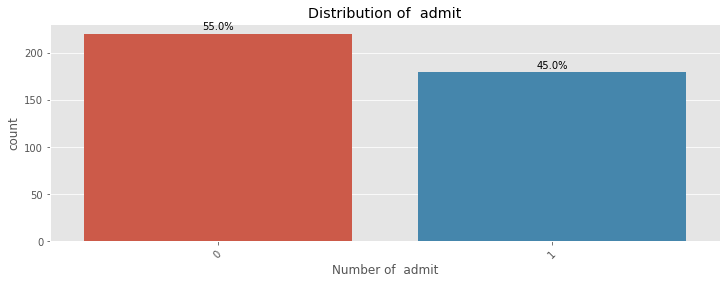

 12%|█▎        | 1/8 [00:00<00:01,  6.29it/s]

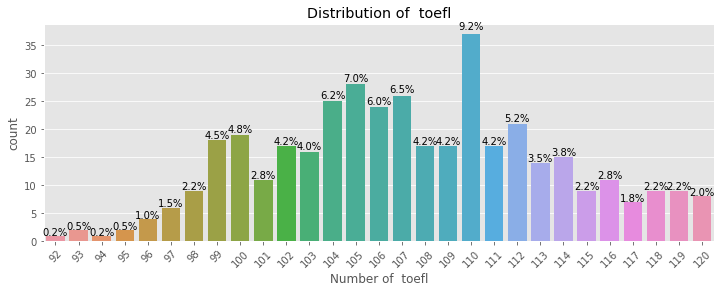

 25%|██▌       | 2/8 [00:00<00:01,  4.23it/s]

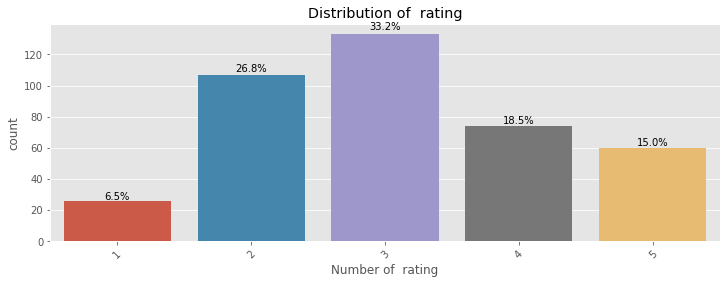

 38%|███▊      | 3/8 [00:00<00:01,  4.48it/s]

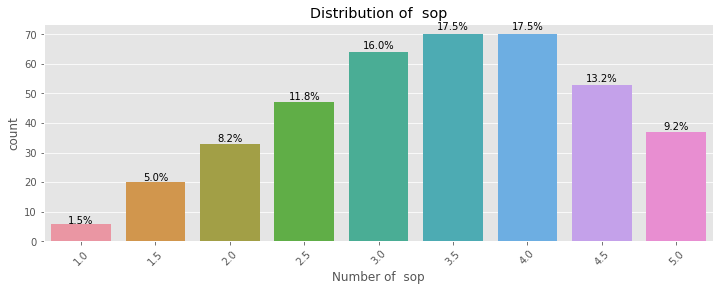

 50%|█████     | 4/8 [00:01<00:00,  4.43it/s]

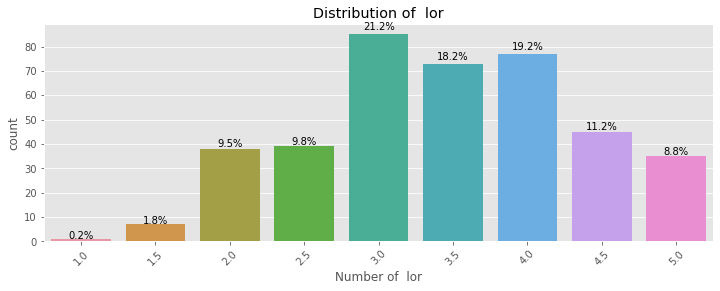

 62%|██████▎   | 5/8 [00:01<00:00,  4.40it/s]

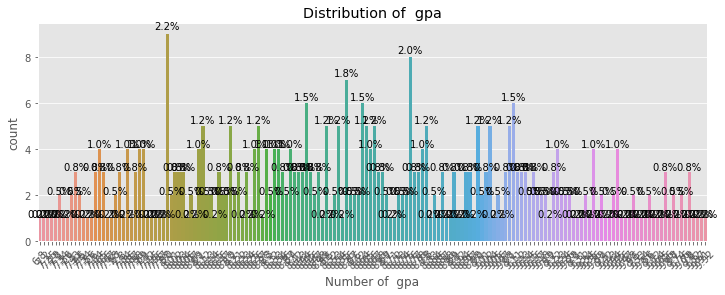

 75%|███████▌  | 6/8 [00:03<00:01,  1.11it/s]

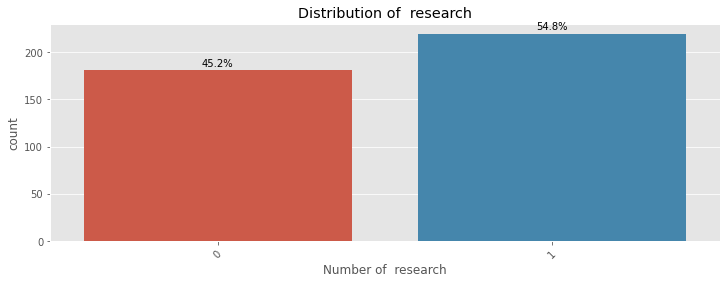

 88%|████████▊ | 7/8 [00:03<00:00,  1.49it/s]

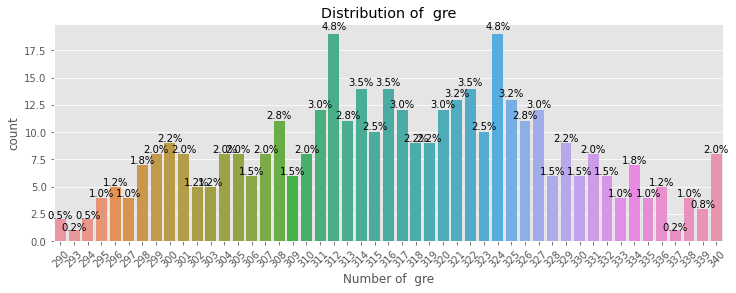

100%|██████████| 8/8 [00:04<00:00,  1.79it/s]


In [32]:
for col in tqdm(list(data.columns)):
    # if (data[col].dtype=='object'):
    plotter(col_name=col)

# Model Selection 

In [34]:
# Features
target = 'admit' #in your case it will be enroll
X = data.drop(columns=target)
y = data[target]

In [36]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=47)

In [37]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((320, 7), (80, 7), (320,), (80,))

# Feature selection using Mutual Information

In [45]:
# get number of most relevant features
threshold= 5 
high_score_ft = []
feature_scores = mutual_info_classif(X,y, random_state=47)


In [48]:
for score, f_name  in sorted(zip(feature_scores, X.columns), reverse=True)[:threshold]:
    print(f_name, score)
    high_score_ft.append(f_name)


gpa 0.37061317136448957
gre 0.30332822375030677
toefl 0.2910036785021717
rating 0.2606040363791253
sop 0.2594849616580881


In [52]:
feature_set = list(set(high_score_ft))

# Building a Logistic Regression Classifier

The accuracy using Logistic Regression is:85.0%
Classification Report
              precision    recall  f1-score   support

         Yes       0.84      0.88      0.86        41
          No       0.86      0.82      0.84        39

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80



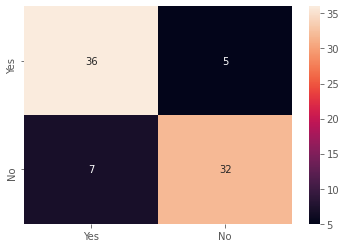

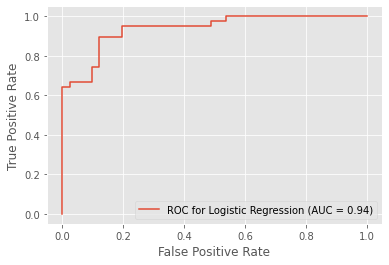

In [68]:
# scale features using standard scaler and build a regression model
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(xtrain[feature_set], ytrain)  # apply scaling on training data
y_pred = pipe.predict(xtest[feature_set])
print(f'The accuracy using Logistic Regression is:{(accuracy_score(ytest, y_pred))*100}%')
cm = confusion_matrix(ytest, y_pred)
print('Classification Report')
print(classification_report(ytest, y_pred,target_names=
                                ['Yes','No']))
sns.heatmap(cm, annot=True, yticklabels=['Yes','No'],xticklabels=['Yes','No'],fmt='d');
plot_roc_curve(pipe,xtest[feature_set], ytest, name='ROC for Logistic Regression');


#Building a Random Forest Classifier



The accuracy using Logistic Regression is:80.0%
Classification Report
              precision    recall  f1-score   support

         Yes       0.77      0.88      0.82        41
          No       0.85      0.72      0.78        39

    accuracy                           0.80        80
   macro avg       0.81      0.80      0.80        80
weighted avg       0.81      0.80      0.80        80



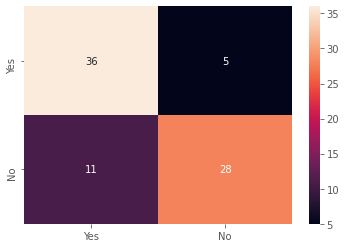

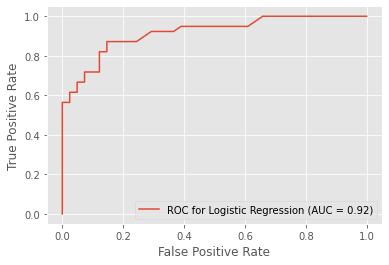

In [69]:
# scale features using standard scaler and build a regression model
pipe = make_pipeline(StandardScaler(), RandomForestClassifier())
pipe.fit(xtrain[feature_set], ytrain)  # apply scaling on training data
y_pred = pipe.predict(xtest[feature_set])
print(f'The accuracy using Logistic Regression is:{(accuracy_score(ytest, y_pred))*100}%')
cm = confusion_matrix(ytest, y_pred)
print('Classification Report')
print(classification_report(ytest, y_pred,target_names=
                                ['Yes','No']))
sns.heatmap(cm, annot=True, yticklabels=['Yes','No'],xticklabels=['Yes','No'],fmt='d');
plot_roc_curve(pipe,xtest[feature_set], ytest, name='ROC for Logistic Regression');


# Tuning the Random Forest Model

In [75]:
# Number of trees in random forest
n_estimators = [int(x) for x in пр.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,20,50,100,150,200,300,500]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 40]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 20]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [76]:
import pprint as pp

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pp.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 50, 100, 150, 200, 300, 500, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 20, 40],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [78]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(xtrain[feature_set], ytrain)

performances = pd.DataFrame.from_dict(rf_random.cv_results_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   28.5s finished


In [82]:
performances[performances['rank_test_score']==1]['params']

6    {'n_estimators': 1400, 'min_samples_split': 5,...
Name: params, dtype: object

In [84]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

The accuracy using Logistic Regression is:83.75%
Classification Report
              precision    recall  f1-score   support

         Yes       0.82      0.88      0.85        41
          No       0.86      0.79      0.83        39

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80



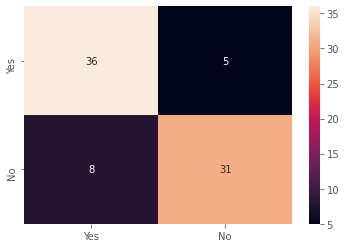

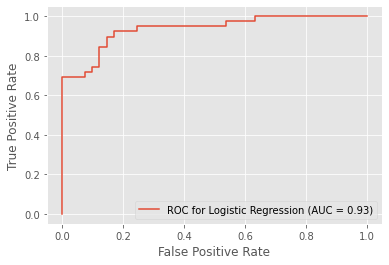

In [85]:
# scale features using standard scaler and build a regression model
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False))
pipe.fit(xtrain[feature_set], ytrain)  # apply scaling on training data
y_pred = pipe.predict(xtest[feature_set])
print(f'The accuracy using Logistic Regression is:{(accuracy_score(ytest, y_pred))*100}%')
cm = confusion_matrix(ytest, y_pred)
print('Classification Report')
print(classification_report(ytest, y_pred,target_names=
                                ['Yes','No']))
sns.heatmap(cm, annot=True, yticklabels=['Yes','No'],xticklabels=['Yes','No'],fmt='d');
plot_roc_curve(pipe,xtest[feature_set], ytest, name='ROC for Logistic Regression');


In [ ]:
z